<center><b><H1> DS 203: Assignment 5 </H1></b></center>
<center><b><H2> Name: Vinit Awale </H2></b></center>
<center><b><H2> Roll No. 18D070067 </H2></b></center>
<center><b><H2> Date: 26/9/2021 </H2></b></center>

## <b> Question 1 </b>
### For the data source at https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 , perform the following steps in python using pandas, matplotlib and/or seaborn. Use code cells to perform functions with a comment for each line explaining what it is doing (and using intuitive variable names), and mark-down cells to note down any significant observations after each code cell (e.g., “Variable X appears to be normal distributed”):

### a) **Preliminaries**
#### i) Read the data file into a data frame.

In [1]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read the given dataset
dataset = pd.read_csv("Dataset\\master.csv")

#### ii) Display a portion of the data to get a feel for the dataset

In [3]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
dataset.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


From the data, we can see that the data is regarding the analysis of the number of suicides in different countries in different years.
The features are:
- Country
- Year
- Sex
- age
- suicides_no
- population
- suicides/100k population
- country- year (This just seems to be a unique identifier for the entries and does not provide any additional information)
- HDI for year
- GDP for year
- GDP per capita 
- Generation (some form of categorical variable representing the kind of generation in the entry)

#### iii) Print the number of records.

In [5]:
dataset.shape[0]

27820

Hence, there are 27820 records in the dataset.

#### iv) Print the number of variables.

In [6]:
dataset.shape[1]

12

Hence, there are 12 variables in the dataset.

#### v) Print the datatype of each variable

In [7]:
datatypes =  dataset.dtypes

datatypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

#### vi) For each variable, print the number of unique values.

In [8]:
# Print number of unique values for each column
dataset.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

#### vii) Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables.

In [9]:
# Here, we append the variable type to the datatypes series we have created above

df = {"Variable" : datatypes.index, "Data type" : datatypes.values}             # Make a dictionary from the series
datatypes = pd.DataFrame(df)                                                    # Convert the dictionary into a dataframe

# Make a series of the type of variable 
variable_type = ["Nominal" , "temporal" , "Nominal" , "Ordinal" , "Integer" ,"Integer" , "Continuous" , "Nominal", "Continuous", "Nominal", "Integer", "Nominal"]

# Append the list to the dataframe
datatypes["Variable type"] = variable_type

datatypes

,Variable,Data type,Variable type
0,country,object,Nominal
1,year,int64,temporal
2,sex,object,Nominal
3,age,object,Ordinal
4,suicides_no,int64,Integer
5,population,int64,Integer
6,suicides/100k pop,float64,Continuous
7,country-year,object,Nominal
8,HDI for year,float64,Continuous
9,gdp_for_year ($),object,Nominal


Hence, we can see the variable types and their Data types in the above table.

#### viii) For each variable, print the number of missing values.

In [10]:
dataset.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Hence, we can see that only one variable (HDI for year) has missing values.

#### ix) Find the number of records withno missing entries.

From the previous part, we can see that 19456 records have missing values for the feature **HDI for year**.

### b) **Discrete Variables**

#### i) For each variable, plot the frequency of each unique value (histogram).

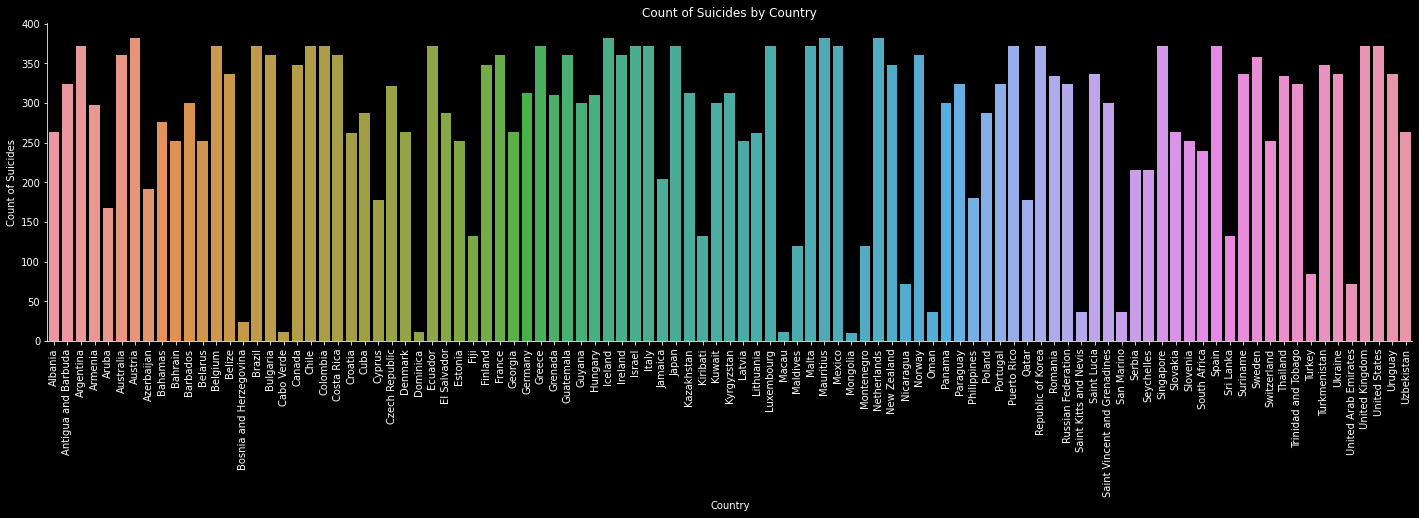

In [35]:
## Make histograms of the variables in dataset

## Make horizontal histogram for country variable
sns.catplot(x="country", data=dataset, kind="count", height=5, aspect=4)
# ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count of Suicides")
plt.title("Count of Suicides by Country")
plt.show()

In [36]:
# Find Mode of country variable
dataset["country"].mode()

0        Austria
1        Iceland
2      Mauritius
3    Netherlands
dtype: object